## PIP Install


In [ ]:
pip install py2app

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
pip install "pandas<0.25.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.20.2 requires pandas>=1.1, but you have pandas 0.24.2 which is incompatible.
plotnine 0.6.0 requires pandas>=0.25.0, but you have pandas 0.24.2 which is incompatible.
mizani 0.6.0 requires pandas>=0.25.0, but you have pandas 0.24.2 which is incompatible.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 0.24.2 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.24.2 which is incompatible.


 ## Importing basic libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from nltk.stem.isri import ISRIStemmer
from sklearn.metrics import accuracy_score
import pandas_datareader as pdr

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## import data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#return text file to a list 
def get_stopping_words(f='/content/drive/MyDrive/data pour projet /algerian_arabic_stopwords .txt'):
    with open(f, encoding='utf-8') as file:
        stopping_words = file.read().split("\n")
    return stopping_words

In [4]:
Alg_stop_words = get_stopping_words()


In [5]:
#data = pd.read_excel('/content/drive/MyDrive/data pour projet /CorpusAlgerien(1).xlsx')
#data.head(5)

In [6]:
import pandas as pd
# Read the data. Here it is already in .csv format.
data = pd.read_csv('/content/drive/MyDrive/data pour projet /Total-dataset.csv')
data.head(5)

,comment,pol,Topic
0,وعلاه خايفين تقعدو فيها وحدكم 😁,1,politique
1,😎 ربي يعاون الرجال,1,sociale
2,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,1,sociale
3,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,1,politique
4,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,1,politique


##Text preprocessing

In [7]:
#Remove diacritics
def remove_d(string):
    regex = re.compile(r'[\u064B\u064C\u064D\u064E\u064F\u0650\u0651\u0652]')
    return re.sub(regex, '', string)

In [8]:
data['diacritics'] = data['comment'].apply(str).apply(remove_d)
data.head(5)

,comment,pol,Topic,diacritics
0,وعلاه خايفين تقعدو فيها وحدكم 😁,1,politique,وعلاه خايفين تقعدو فيها وحدكم 😁
1,😎 ربي يعاون الرجال,1,sociale,😎 ربي يعاون الرجال
2,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,1,sociale,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...
3,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,1,politique,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية
4,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,1,politique,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...


In [9]:
#normalization
def normalize(string):
    regex = re.compile(r'[إأٱآا]')
    string = re.sub(regex, 'ا', string)
    regex = re.compile(r'[ى]')
    string = re.sub(regex, 'ي', string)
    regex = re.compile(r'[ؤئ]')
    string = re.sub(regex, 'ء', string)
    regex = re.compile(r'ه+ه')
    string = re.sub(regex, 'ههه', string)
    regex = re.compile(r'و+و')
    string = re.sub(regex, 'و', string)
    return string

In [10]:
data['normalized'] = data['diacritics'].apply(normalize)
data.head()

,comment,pol,Topic,diacritics,normalized
0,وعلاه خايفين تقعدو فيها وحدكم 😁,1,politique,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁
1,😎 ربي يعاون الرجال,1,sociale,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال
2,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,1,sociale,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...
3,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,1,politique,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية
4,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,1,politique,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...


In [11]:
#remove extra whitespace
def remove_e_w_s(string):
  regex = re.compile(r'[\s+]')
  string = re.sub(regex,' ', string)
  return string

In [12]:
data['whitespace'] = data['normalized'].apply(remove_e_w_s)
data.head()

,comment,pol,Topic,diacritics,normalized,whitespace
0,وعلاه خايفين تقعدو فيها وحدكم 😁,1,politique,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁
1,😎 ربي يعاون الرجال,1,sociale,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال
2,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,1,sociale,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...
3,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,1,politique,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية
4,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,1,politique,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...


In [13]:
#remove symboles 
def remove_symboles(string):
    return re.sub(r'[^\u0600-\u06FF]', ' ', string)

In [14]:
data['symboles'] = data['whitespace'].apply(remove_symboles)
data.head()

,comment,pol,Topic,diacritics,normalized,whitespace,symboles
0,وعلاه خايفين تقعدو فيها وحدكم 😁,1,politique,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم
1,😎 ربي يعاون الرجال,1,sociale,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,ربي يعاون الرجال
2,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,1,sociale,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...
3,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,1,politique,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو ستناو دزاير الجديدة راهي جاية
4,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,1,politique,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...


In [15]:
#Tokenisation
def token(sentence):
   
    words = nltk.word_tokenize(sentence)
    new_words= [word for word in words if word.isalnum()]

    return(new_words)

In [16]:
data['token'] = data['symboles'].apply(token)
data.head()

,comment,pol,Topic,diacritics,normalized,whitespace,symboles,token
0,وعلاه خايفين تقعدو فيها وحدكم 😁,1,politique,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم,"[وعلاه, خايفين, تقعدو, فيها, وحدكم]"
1,😎 ربي يعاون الرجال,1,sociale,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,ربي يعاون الرجال,"[ربي, يعاون, الرجال]"
2,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,1,sociale,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,"[جيبوها, من, لخر, قبايل, و, كلكم, تعرفو, شكون,..."
3,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,1,politique,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو ستناو دزاير الجديدة راهي جاية,"[علاه, راهم, يحرڤو, ستناو, دزاير, الجديدة, راه..."
4,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,1,politique,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,"[الله, يعاونكم, انا, شاء, الله, وهنيكم, من, ال..."


In [17]:
#stopwords
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('arabic')]

In [18]:
data['stpwrds'] = data['token'].apply(remove_stopwords)
data.head()

,comment,pol,Topic,diacritics,normalized,whitespace,symboles,token,stpwrds
0,وعلاه خايفين تقعدو فيها وحدكم 😁,1,politique,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم,"[وعلاه, خايفين, تقعدو, فيها, وحدكم]","[وعلاه, خايفين, تقعدو, وحدكم]"
1,😎 ربي يعاون الرجال,1,sociale,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,ربي يعاون الرجال,"[ربي, يعاون, الرجال]","[ربي, يعاون, الرجال]"
2,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,1,sociale,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,"[جيبوها, من, لخر, قبايل, و, كلكم, تعرفو, شكون,...","[جيبوها, لخر, قبايل, كلكم, تعرفو, شكون, هوما, ..."
3,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,1,politique,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو ستناو دزاير الجديدة راهي جاية,"[علاه, راهم, يحرڤو, ستناو, دزاير, الجديدة, راه...","[علاه, راهم, يحرڤو, ستناو, دزاير, الجديدة, راه..."
4,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,1,politique,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,"[الله, يعاونكم, انا, شاء, الله, وهنيكم, من, ال...","[الله, يعاونكم, انا, شاء, الله, وهنيكم, المسءل..."


In [19]:
#remove Algerian stop_words
def Alg_stopwords(text):
    return [word for word in text if word not in Alg_stop_words]

In [20]:
data['Alg'] = data['stpwrds'].apply(Alg_stopwords)
data.head()

,comment,pol,Topic,diacritics,normalized,whitespace,symboles,token,stpwrds,Alg
0,وعلاه خايفين تقعدو فيها وحدكم 😁,1,politique,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم,"[وعلاه, خايفين, تقعدو, فيها, وحدكم]","[وعلاه, خايفين, تقعدو, وحدكم]","[وعلاه, خايفين, تقعدو, وحدكم]"
1,😎 ربي يعاون الرجال,1,sociale,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,ربي يعاون الرجال,"[ربي, يعاون, الرجال]","[ربي, يعاون, الرجال]","[ربي, يعاون, الرجال]"
2,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,1,sociale,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,"[جيبوها, من, لخر, قبايل, و, كلكم, تعرفو, شكون,...","[جيبوها, لخر, قبايل, كلكم, تعرفو, شكون, هوما, ...","[جيبوها, لخر, قبايل, كلكم, تعرفو, شكون, ربي, ي..."
3,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,1,politique,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو ستناو دزاير الجديدة راهي جاية,"[علاه, راهم, يحرڤو, ستناو, دزاير, الجديدة, راه...","[علاه, راهم, يحرڤو, ستناو, دزاير, الجديدة, راه...","[علاه, راهم, يحرڤو, ستناو, دزاير, الجديدة, جاية]"
4,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,1,politique,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,"[الله, يعاونكم, انا, شاء, الله, وهنيكم, من, ال...","[الله, يعاونكم, انا, شاء, الله, وهنيكم, المسءل...","[الله, يعاونكم, شاء, الله, وهنيكم, المسءلين, ا..."


In [21]:
#stemming

def light_stem(text):
    #words = text.split()
    result = list()
    stemmer = ISRIStemmer()
    for word in text:
        word = stemmer.norm(word, num=1)      # remove diacritics which representing Arabic short vowels
        if not word in stemmer.stop_words:    # exclude stop words from being processed
            word = stemmer.pre32(word)        # remove length three and length two prefixes in this order
            word = stemmer.suf32(word)        # remove length three and length two suffixes in this order
            word = stemmer.waw(word)          # remove connective ‘و’ if it precedes a word beginning with ‘و’
            word = stemmer.norm(word, num=2)  # normalize initial hamza to bare alif
        result.append(word)
    return ' '.join(result)

In [22]:
data['stem'] = data['Alg'].apply(light_stem)
data.head()

,comment,pol,Topic,diacritics,normalized,whitespace,symboles,token,stpwrds,Alg,stem
0,وعلاه خايفين تقعدو فيها وحدكم 😁,1,politique,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم 😁,وعلاه خايفين تقعدو فيها وحدكم,"[وعلاه, خايفين, تقعدو, فيها, وحدكم]","[وعلاه, خايفين, تقعدو, وحدكم]","[وعلاه, خايفين, تقعدو, وحدكم]",وعلاه خايف تقعدو وحد
1,😎 ربي يعاون الرجال,1,sociale,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,😎 ربي يعاون الرجال,ربي يعاون الرجال,"[ربي, يعاون, الرجال]","[ربي, يعاون, الرجال]","[ربي, يعاون, الرجال]",ربي يعا رجال
2,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,1,sociale,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,جيبوها من لخر قبايل و كلكم تعرفو شكون هو...,"[جيبوها, من, لخر, قبايل, و, كلكم, تعرفو, شكون,...","[جيبوها, لخر, قبايل, كلكم, تعرفو, شكون, هوما, ...","[جيبوها, لخر, قبايل, كلكم, تعرفو, شكون, ربي, ي...",جيبو لخر قبايل كلكم تعرفو شكون ربي يعاون يخدمو...
3,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,1,politique,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو 🤔ستناو دزاير الجديدة راهي جاية,علاه راهم يحرڤو ستناو دزاير الجديدة راهي جاية,"[علاه, راهم, يحرڤو, ستناو, دزاير, الجديدة, راه...","[علاه, راهم, يحرڤو, ستناو, دزاير, الجديدة, راه...","[علاه, راهم, يحرڤو, ستناو, دزاير, الجديدة, جاية]",علاه راهم يحرڤو ستناو دزاير جديدة جاية
4,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,1,politique,الله يعاونكم انا شاء الله وهنيكم من المسؤلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,الله يعاونكم انا شاء الله وهنيكم من المسءلين ا...,"[الله, يعاونكم, انا, شاء, الله, وهنيكم, من, ال...","[الله, يعاونكم, انا, شاء, الله, وهنيكم, المسءل...","[الله, يعاونكم, شاء, الله, وهنيكم, المسءلين, ا...",الله يعاون شاء الله وهني مسءل سراق


In [23]:
data['stem']

0                                    وعلاه خايف تقعدو وحد
1                                            ربي يعا رجال
2       جيبو لخر قبايل كلكم تعرفو شكون ربي يعاون يخدمو...
3                  علاه راهم يحرڤو ستناو دزاير جديدة جاية
4                      الله يعاون شاء الله وهني مسءل سراق
                              ...                        
4382                           بلاد كاملة تزرع ينبت يدعمو
4383    تنقصل زيد ديما غالب هادو تجار اخر زمان قناعة شفقة
4384                              لاه منقدروش نعلقو بصورة
4385                                      حمدلله ربي عالم
4386    نحاو ضريبة علي اكل حيوان رشمو علي لعباد افريق ...
Name: stem, Length: 4387, dtype: object

## Creating word2vec for arabic text classification

In [ ]:
corpus = (data['stem'])

In [ ]:
all_words = [nltk.word_tokenize(sent) for sent in corpus]
all_words

In [ ]:
L =sum(all_words, [])
len(L)

55503

In [ ]:
from gensim.models import Word2Vec

In [ ]:
import gensim
model = gensim.models.Word2Vec(
    all_words,
    window=2,
    size=64,
    min_count=1,
    workers = 4
)

In [ ]:
vocabulary = model.wv.vocab
vocabulary

In [ ]:
len(vocabulary)

16372

In [ ]:
#model.wv['رجال']

In [ ]:
#model.wv.most_similar(positive=['خايف'])

In [ ]:
model.save("word2vec.model")

In [ ]:
model = Word2Vec.load("word2vec.model")


In [ ]:
w2v = model.train(corpus, total_examples=1, epochs=1)

In [ ]:
word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

In [ ]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')

In [ ]:
all_words[0]

['نريد', 'تعديل', 'اجور']

In [ ]:
vector = wv[ all_words[0] ]
vector

## Countvectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [25]:
corpus = (data['stem'])
vocabulary=vectorizer.fit(corpus)
type(vocabulary)

sklearn.feature_extraction.text.CountVectorizer

In [26]:
X= vectorizer.transform(corpus)
X.shape

(4387, 12388)

In [27]:
X = X.toarray()

In [28]:
spca = SparsePCA(
  n_components=10,
  random_state=0
  )

In [29]:
X = spca.fit_transform(X)

In [48]:
Y = data['pol']

In [49]:
Y = Y.to_numpy()
Y

array([ 1,  1,  1, ...,  0,  1, -1])

In [50]:
Y.shape

(4387,)

In [51]:
with open('model_vect.pickle', mode='wb') as f:
   vec = pickle.dump(vectorizer,f,protocol=2)

## Splitting into Training and Test sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Apply NB model

In [53]:
classifier = GaussianNB()

In [54]:
classifier.fit(X_train, y_train)

GaussianNB()

In [55]:
x_pred_NB = classifier.predict(X_train)
#Train Accuracy
acc_tr_NB = accuracy_score(y_train, x_pred_NB)
acc_tr_NB * 100

20.946138500997435

In [56]:
y_pred_NB = classifier.predict(X_test)
#y_pred_NB

In [57]:
#Test Accuracy
acc_t_NB = accuracy_score(y_test, y_pred_NB)
acc_t_NB * 100

20.842824601366743

In [ ]:
with open('model.pickle', mode='wb') as f:
    pickle.dump(classifier,f,protocol=2)

## Decision Tree


In [58]:
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [59]:
history = classifier1.fit(X_train, y_train)

In [60]:
#Prediction of training
Y_pred_DT = classifier1.predict(X_train)
#Train Accuracy
acc_tr_DT = accuracy_score(y_train, Y_pred_DT)
acc_tr_DT * 100

73.69620974636648

In [61]:
y_pred_DT = classifier1.predict(X_test)
#y_pred_DT

In [62]:
accuracy_T = accuracy_score(y_test, y_pred_DT)
accuracy_T * 100

67.65375854214123

## Random forest

In [63]:
classifier2 = RandomForestClassifier()

In [64]:
classifier2.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred_RD = classifier2.predict(X_test)
#y_pred_RD

In [66]:
accuracy_RD = accuracy_score(y_test, y_pred_RD)
accuracy_RD * 100

68.10933940774487

In [67]:
with open('modelRD.pickle', mode='wb') as f:
    pickle.dump(classifier2,f,protocol=2)

## SVC

In [68]:
from sklearn import svm
from sklearn.svm import SVC

classifier3 = SVC(kernel='linear')

In [69]:
classifier3.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
y_pred_svc = classifier3.predict(X_test)
#y_pred_svc

In [71]:
from sklearn.metrics import accuracy_score
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(accuracy_svc * 100)

67.53986332574033


In [72]:
with open('modelsvc.pickle', mode='wb') as f:
    pickle.dump(classifier3,f,protocol=2)

## Logistique regression 

In [73]:
classifier4 = LogisticRegression(random_state=0)

In [74]:
classifier4.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [75]:
y_pred_LR = classifier4.predict(X_test)
#y_pred_LR

In [76]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(accuracy_LR * 100)

68.56492027334852


In [84]:
with open('modelRL.pickle', mode='wb') as f:
    pickle.dump(classifier4,f,protocol=2)

## Comparing Accuracies between Algorithms

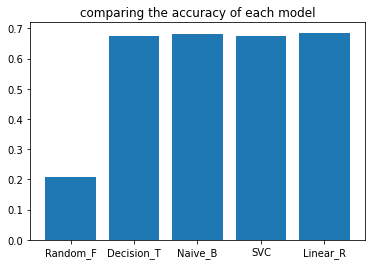

In [77]:

Accuracy = [acc_t_NB, accuracy_T, accuracy_RD, accuracy_svc, accuracy_LR]
Methods = ['Random_F', 'Decision_T', 'Naive_B', 'SVC', 'Linear_R']
Accuracy_pos = np.arange(len(Methods))
acc = np.arange(5)
########
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(acc, Methods)
plt.title('comparing the accuracy of each model')
plt.show()

## Input

In [78]:
jomla = input("دخل الكمونتير :")

دخل الكمونتير :ضرك  نتا # كي ترووح...% من بعد سهل


In [79]:
jomla

'ضرك  نتا # كي ترووح...% من بعد سهل'

In [ ]:
#open model NB
with open('model.pickle', mode='rb') as f:
    classifier = pickle.load(f)

In [81]:
#open model RD
with open('modelRD.pickle', mode='rb') as f:
    classifier2 = pickle.load(f)

In [82]:
#open model SVC
with open('modelsvc.pickle', mode='rb') as f:
    classifier30 = pickle.load(f)

In [85]:
#open model RL
with open('modelRL.pickle', mode='rb') as f:
    classifier4 = pickle.load(f)

In [86]:
def preprocess (sent):

    sent = remove_d(sent)
    sent = normalize(sent)
    sent = remove_e_w_s(sent)
    sent = remove_symboles(sent)
    sent = token(sent)
    sent = remove_stopwords(sent)
    sent = Alg_stopwords(sent)
    sent = light_stem(sent)
    return sent

In [87]:
preprocess (jomla)

'تروح سهل'

In [ ]:
    df = pd.read_csv(StringIO(jomla))
    X= vectorizer.transform(df)
    X = X.toarray()
 

In [ ]:
#txt_repr (jomla)


array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#opply model SVC
ans = classifier30.predict(X)

In [ ]:
ans1 = classifier2.predict(X)

In [ ]:
ans

array([-1])

In [ ]:
def result (anss):
  if ans[0] == 1:
    print('ur cmnt is pos')
  elif ans[0] == -1:
    print('ur cmnt is neg')
  else:
    print('ur cmnt is neutral')

In [ ]:
result (ans)

ur cmnt is neg


In [ ]:
if ans[0] == 1:
  print('ur cmnt is pos')
elif ans[0] == -1:
  print('ur cmnt is neg')
else:
  print('ur cmnt is neutral')

ur cmnt is pos
